In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import os
os.getcwd()

'C:\\Users\\JENIFFER JOHN\\DSE\\SampleData\\SLC'

In [11]:
os.chdir('C:\\Users\\JENIFFER JOHN\\DSE\\SampleData\\SLC')
import warnings
warnings.filterwarnings('ignore')

In [12]:
data= pd.read_csv('telco_chrun_encoded.csv')
data = data.sample(frac=1,random_state=3) 
#frac means in whole data,fraction of 100 percent , it could be 0.1 which is 10% of whole data
data.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,...,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,...,1687.95,1,93.775000,1,0,0,0,0,1,0
2170,1,0,0,0,30,1,0,0,0,0,...,2555.90,1,85.196667,1,0,0,0,0,1,0
4230,0,0,0,0,5,1,0,0,0,1,...,346.40,1,69.280000,0,0,0,0,0,1,0
510,0,0,0,0,61,1,1,1,0,1,...,6300.15,0,103.281148,1,0,0,0,0,1,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 5571 to 5994
Data columns (total 25 columns):
gender                             7032 non-null int64
senior                             7032 non-null int64
partner                            7032 non-null int64
dependents                         7032 non-null int64
tenure                             7032 non-null int64
phone_service                      7032 non-null int64
multiple_lines                     7032 non-null int64
online_security                    7032 non-null int64
online_backup                      7032 non-null int64
device_protection                  7032 non-null int64
tech_support                       7032 non-null int64
streaming_tv                       7032 non-null int64
streaming_movies                   7032 non-null int64
paperless_billing                  7032 non-null int64
monthly_charges                    7032 non-null float64
total_charges                      7032 non-null float64
churn 

In [14]:
data.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [15]:
data.churn.value_counts()

0    5163
1    1869
Name: churn, dtype: int64

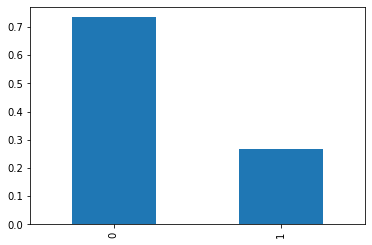

In [16]:
data.churn.value_counts(normalize=True).plot(kind='bar')

## We have a data imbalance. But that will not affect out model to a greater extend

# Univariate Analysis

### Distplot

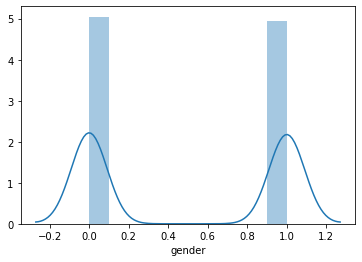

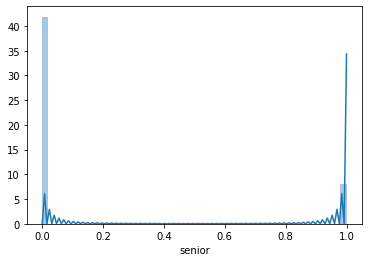

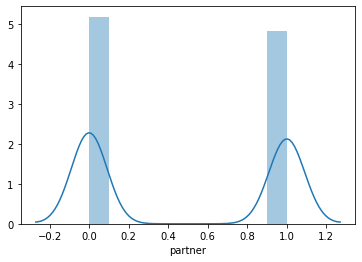

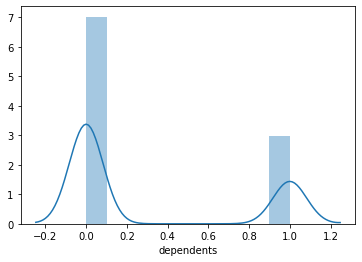

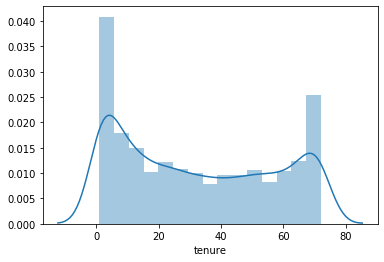

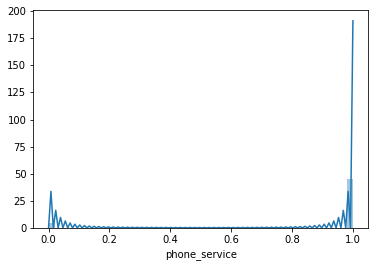

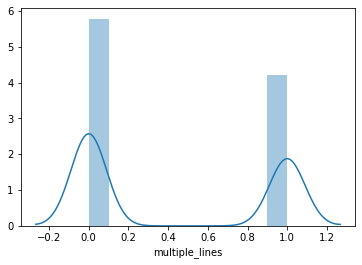

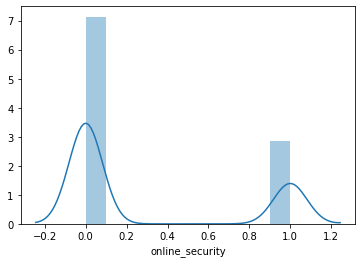

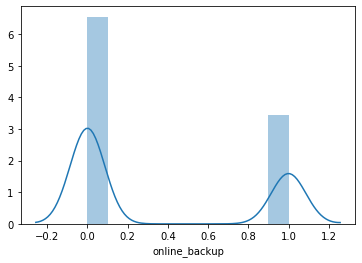

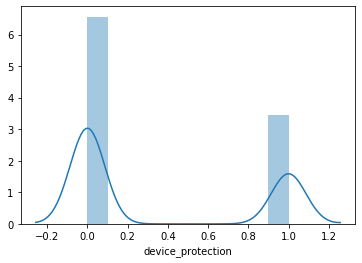

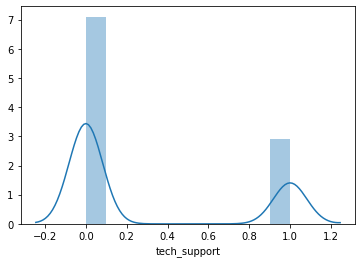

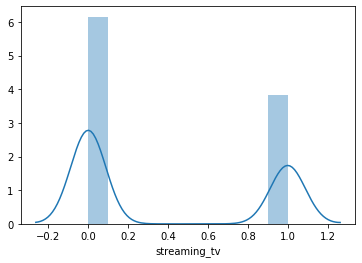

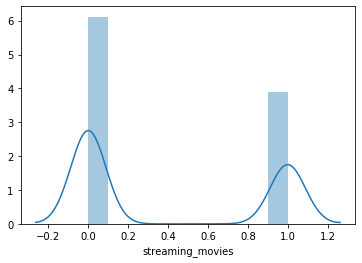

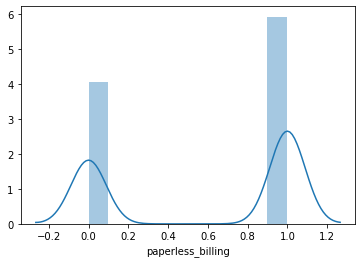

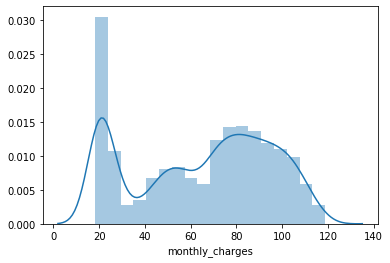

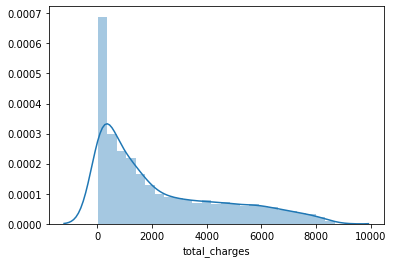

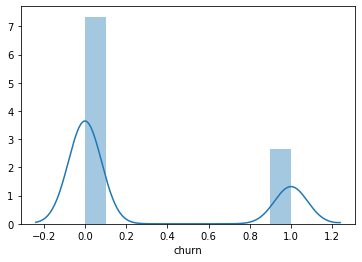

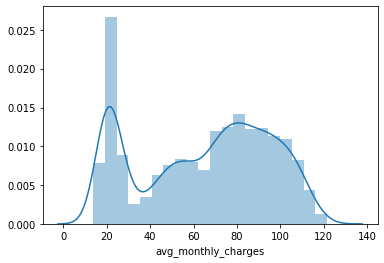

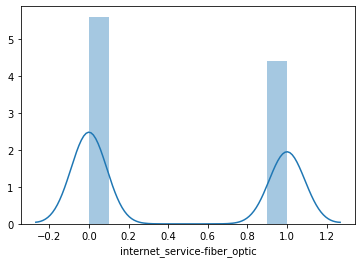

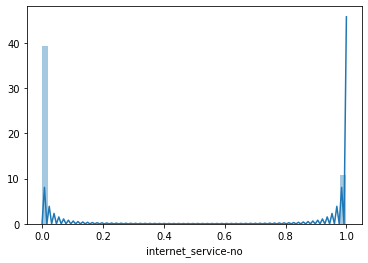

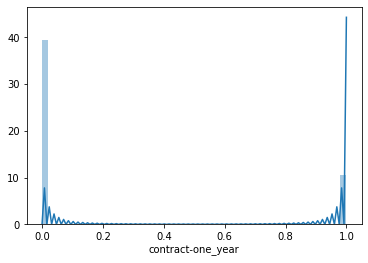

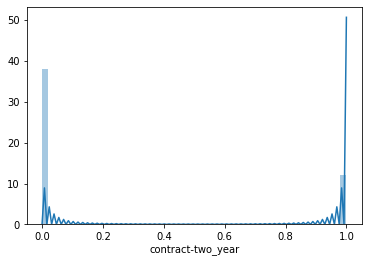

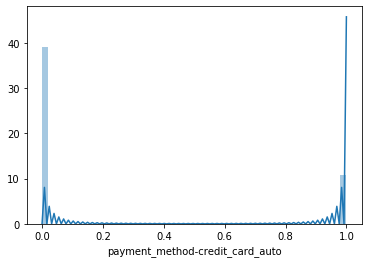

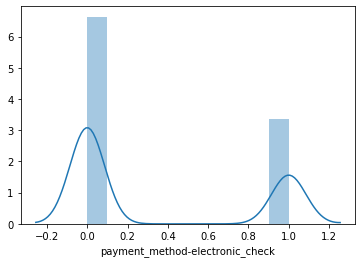

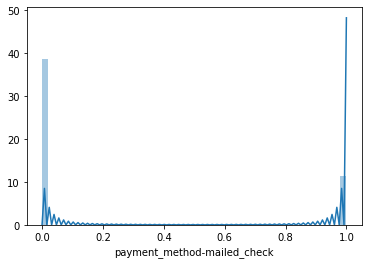

In [18]:
for col in data.columns:
    sns.distplot(data[col])
    plt.show()

# Inference:

  The distribution is bimodal-which has two classes and the graphs onec again shows that data is imbalanced 
  

### Box-plot:

In [8]:
data= data.sample(frac=1,random_state=3)
y=data['churn']
X= data.drop(['churn'],axis=1)

In [10]:
X.shape,y.shape

((7032, 24), (7032,))

# Splitting train and test

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=3)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((4922, 24), (2110, 24), (4922,), (2110,))

# Standardizing

In [13]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
Xs= ss.fit_transform(X)

X_trains = ss.fit_transform(X_train) 
#here we are fitting and transforming because we make the model learn our data while fittig
X_tests = ss.transform(X_test) 
#test data should not be learnt by machine, we use only for predicting,so we just transform

# Building predictive algorithm using Random Forest

Confusion Matrix - Train: 
 [[3638    2]
 [   6 1276]]


Overall Accuracy - Train:  0.9983746444534742
Classification_report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00      3640
           1       1.00      1.00      1.00      1282

    accuracy                           1.00      4922
   macro avg       1.00      1.00      1.00      4922
weighted avg       1.00      1.00      1.00      4922

AUC - Train:  0.9999798563371105


Confusion Matrix - Test: 
 [[1354  169]
 [ 303  284]]


Overall Accuracy - Test:  0.776303317535545
Classification_report:
                precision    recall  f1-score   support

           0       0.82      0.89      0.85      1523
           1       0.63      0.48      0.55       587

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.76      0.78      0.77      2110

AUC - Test:  0.8171825311157369


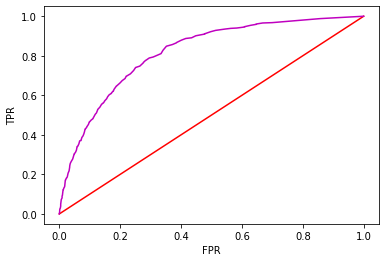

In [14]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_trains,y_train)

y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr,color='m')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Hyper parameter tuning of Random Forest

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc = RandomForestClassifier(random_state=3)

params={'n_estimators':sp_randint(50,100),
        'max_features':sp_randint(1,24),
        'max_depth':sp_randint(2,20),
        'min_samples_split':sp_randint(2,20),
        'min_samples_leaf': sp_randint(1,20),
        'criterion':['gini','entropy']
}

rsearch_rfc =RandomizedSearchCV(rfc,param_distributions=params,  n_jobs=-1,n_iter=200,cv=3,scoring= 'roc_auc',random_state=3,return_train_score=True) 
#for cv,return_train_score will give train score along with test score

rsearch_rfc.fit(X,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [16]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 2,
 'min_samples_leaf': 18,
 'min_samples_split': 3,
 'n_estimators': 71}

In [17]:
rs= pd.DataFrame(rsearch_rfc.cv_results_)
rs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.174521,0.036309,0.084501,0.001751,gini,5,9,1,12,93,...,0.842590,0.842583,0.842077,0.000720,61,0.864845,0.864699,0.864748,0.864764,0.000061
1,2.195481,0.041045,0.091591,0.024296,entropy,11,11,7,2,70,...,0.839166,0.838853,0.839378,0.000537,100,0.933919,0.938313,0.938230,0.936820,0.002052
2,1.354849,0.103050,0.061561,0.008041,gini,9,15,18,4,52,...,0.840473,0.838775,0.840594,0.001537,89,0.896039,0.896126,0.896562,0.896243,0.000229
3,2.201767,0.084691,0.070980,0.001774,entropy,3,20,6,10,96,...,0.833330,0.830189,0.831505,0.001332,178,0.839111,0.837798,0.837457,0.838122,0.000713
4,1.545450,0.059364,0.079201,0.017436,entropy,12,8,12,3,65,...,0.842724,0.839721,0.841882,0.001540,64,0.910494,0.912518,0.912552,0.911854,0.000962


In [18]:
rs[rs['rank_test_score']==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
7,0.58672,0.00526,0.076585,0.002216,entropy,16,2,18,3,71,...,0.849806,0.845827,0.846435,0.002541,1,0.875962,0.874572,0.876625,0.87572,0.000855


# Building random forest with tuned hyperparameters (hyperopt)

Confusion Matrix - Train: 
 [[3442  198]
 [ 704  578]]


Overall Accuracy - Train:  0.8167411621292158


Classification_report:
                precision    recall  f1-score   support

           0       0.83      0.95      0.88      3640
           1       0.74      0.45      0.56      1282

    accuracy                           0.82      4922
   macro avg       0.79      0.70      0.72      4922
weighted avg       0.81      0.82      0.80      4922

AUC - Train:  0.879367531844131


Confusion Matrix - Test: 
 [[1413  110]
 [ 354  233]]


Overall Accuracy - Test:  0.7800947867298578


Classification_report:
                precision    recall  f1-score   support

           0       0.80      0.93      0.86      1523
           1       0.68      0.40      0.50       587

    accuracy                           0.78      2110
   macro avg       0.74      0.66      0.68      2110
weighted avg       0.77      0.78      0.76      2110

AUC - Test:  0.8410616990361308


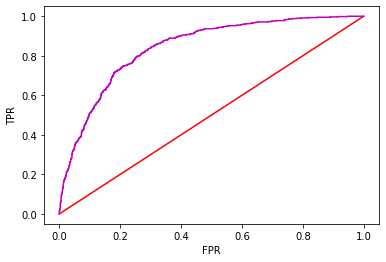

In [19]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)
rfc.fit(X_trains,y_train)


y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('\n')
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('\n')
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))

fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr,color='m')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### How much drop in performance when each feature is removed? 

#### This cannot be compared to coeffecients.. But this can be used for feature selection.

althouh random forest is a black-boz, we get these info from it

In [20]:
imp=pd.DataFrame(rfc.feature_importances_,index=X.columns, columns=['importance'])
imp=imp.sort_values(by='importance',ascending=False)
imp

,importance
tenure,0.156077
total_charges,0.131252
contract-two_year,0.112455
internet_service-fiber_optic,0.096065
avg_monthly_charges,0.078511
monthly_charges,0.077255
payment_method-electronic_check,0.053997
contract-one_year,0.044593
internet_service-no,0.041642
online_security,0.032378


# K-NN Algorithm with hyperopt(hyper optimisation and building model with them


#### For KNN algo, we need to standardize or normalize our data. because the scales are different , the feature with big values will influence and cause bias

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

knn=  KNeighborsClassifier()
params={'n_neighbors':sp_randint(1,20),'p':sp_randint(1,5)}
rsearch_knn= RandomizedSearchCV(knn, param_distributions=params,n_jobs=-1, cv=3, n_iter=50, return_train_score=True, random_state=3)
rsearch_knn.fit(Xs,y) #whole dataset for model

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002043E162B88>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002043E1EAAC8>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [22]:
rsearch_knn.best_params_

{'n_neighbors': 18, 'p': 1}

Confusion Matrix - Train: 
 [[3301  339]
 [ 579  703]]


Overall Accuracy - Train:  0.8134904510361641
Classification_report:
                precision    recall  f1-score   support

           0       0.85      0.91      0.88      3640
           1       0.67      0.55      0.60      1282

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.81      4922

AUC - Train:  0.8600697956489689


Confusion Matrix - Test: 
 [[1340  183]
 [ 278  309]]


Overall Accuracy - Test:  0.7815165876777251
Classification_report:
                precision    recall  f1-score   support

           0       0.83      0.88      0.85      1523
           1       0.63      0.53      0.57       587

    accuracy                           0.78      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.77      0.78      0.78      2110

AUC - Test:  0.8188167574756628


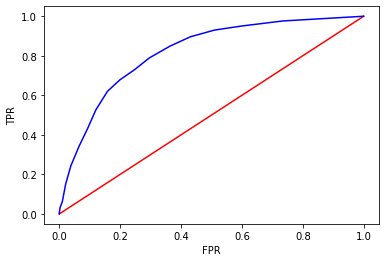

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve


knn=  KNeighborsClassifier(**rsearch_knn.best_params_)
knn.fit(X_trains,y_train)


y_train_pred = knn.predict(X_trains)
y_train_prob = knn.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = knn.predict(X_tests)
y_test_prob = knn.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [24]:
knn.effective_metric_

'manhattan'

## STACKING results of 3 learners [Random Forest ,K-NN, Logistic Regression]

#### Using Logisctic regression as base model always or Naive bayes is fine too

Confusion Matrix - Train: 
 [[3293  347]
 [ 574  708]]


Overall Accuracy - Train:  0.812880942706217
Classification_report:
                precision    recall  f1-score   support

           0       0.85      0.90      0.88      3640
           1       0.67      0.55      0.61      1282

    accuracy                           0.81      4922
   macro avg       0.76      0.73      0.74      4922
weighted avg       0.80      0.81      0.81      4922

AUC - Train:  0.8504838764979171


Confusion Matrix - Test: 
 [[1355  168]
 [ 276  311]]


Overall Accuracy - Test:  0.7895734597156399
Classification_report:
                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1523
           1       0.65      0.53      0.58       587

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110

AUC - Test:  0.8404901113086004


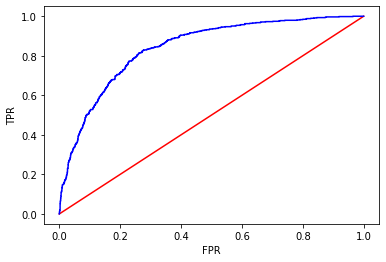

In [25]:
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression(solver='liblinear')
lr.fit(X_trains,y_train)
y_train_pred = lr.predict(X_trains)
y_train_prob = lr.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = lr.predict(X_tests)
y_test_prob = lr.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Using Hard voting

In [26]:
from sklearn.ensemble import VotingClassifier

lr= LogisticRegression(solver='liblinear')
knn=  KNeighborsClassifier(**rsearch_knn.best_params_)
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)

In [27]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='hard')
clf.fit(X_trains,y_train)

y_train_pred=clf.predict(X_trains)
y_test_pred=clf.predict(X_tests)

print('Accuracy score - Train',accuracy_score(y_train,y_train_pred))
print('Accuracy score - Test',accuracy_score(y_test,y_test_pred))

Accuracy score - Train 0.8179601787891101
Accuracy score - Test 0.7914691943127962


# Using soft Voting -equal weightage

#### we didnt touch the weightage at all ,so every model is given equal weightage

Confusion Matrix - Train: 
 [[3342  298]
 [ 579  703]]


Overall Accuracy - Train:  0.821820398212109
Classification_report:
                precision    recall  f1-score   support

           0       0.85      0.92      0.88      3640
           1       0.70      0.55      0.62      1282

    accuracy                           0.82      4922
   macro avg       0.78      0.73      0.75      4922
weighted avg       0.81      0.82      0.81      4922

AUC - Train:  0.8701181618693319


Confusion Matrix - Test: 
 [[1361  162]
 [ 282  305]]


Overall Accuracy - Test:  0.7895734597156399
Classification_report:
                precision    recall  f1-score   support

           0       0.83      0.89      0.86      1523
           1       0.65      0.52      0.58       587

    accuracy                           0.79      2110
   macro avg       0.74      0.71      0.72      2110
weighted avg       0.78      0.79      0.78      2110

AUC - Test:  0.8391165110553566


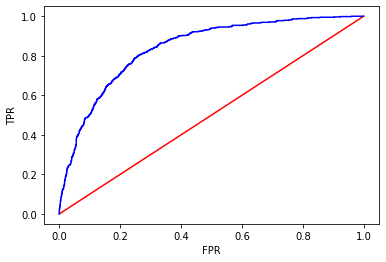

In [28]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='soft')
clf.fit(X_trains,y_train) #it will fit all 3 seperately,it will use the model result to predict the predicted value

y_train_pred = clf.predict(X_trains)
y_train_prob = clf.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Using soft Voting- with weightage added

Confusion Matrix - Train: 
 [[3374  266]
 [ 609  673]]


Overall Accuracy - Train:  0.8222267370987404
Classification_report:
                precision    recall  f1-score   support

           0       0.85      0.93      0.89      3640
           1       0.72      0.52      0.61      1282

    accuracy                           0.82      4922
   macro avg       0.78      0.73      0.75      4922
weighted avg       0.81      0.82      0.81      4922

AUC - Train:  0.873646302994977


Confusion Matrix - Test: 
 [[1379  144]
 [ 296  291]]


Overall Accuracy - Test:  0.7914691943127962
Classification_report:
                precision    recall  f1-score   support

           0       0.82      0.91      0.86      1523
           1       0.67      0.50      0.57       587

    accuracy                           0.79      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.78      0.79      0.78      2110

AUC - Test:  0.838269755850385


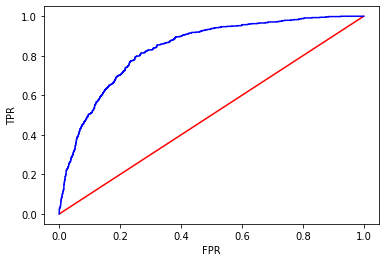

In [29]:
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)], weights=[1,2,3],
                     voting='soft')

clf.fit(X_trains,y_train) #it will fit all 3 seperately,it will use the model result to predict the predicted value

y_train_pred = clf.predict(X_trains)
y_train_prob = clf.predict_proba(X_trains)[:,1]

print('Confusion Matrix - Train: \n', confusion_matrix(y_train, y_train_pred))
print('\n')
print('Overall Accuracy - Train: ', accuracy_score(y_train, y_train_pred))
print('Classification_report:\n ', classification_report(y_train, y_train_pred))
print('AUC - Train: ', roc_auc_score(y_train, y_train_prob))

y_test_pred = clf.predict(X_tests)
y_test_prob = clf.predict_proba(X_tests)[:,1]

print('\n')
print('Confusion Matrix - Test: \n', confusion_matrix(y_test, y_test_pred))
print('\n')
print('Overall Accuracy - Test: ', accuracy_score(y_test, y_test_pred))
print('Classification_report:\n ', classification_report(y_test, y_test_pred))
print('AUC - Test: ', roc_auc_score(y_test, y_test_prob))


fpr,tpr,threshold = roc_curve(y_test,y_test_prob)
plt.plot(fpr,fpr, color='r')# diagonal
plt.plot(fpr,tpr, color='b')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()